Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
import warnings
warnings.filterwarnings("ignore")

This will convert insurance.csv file to insurance_dataset dataframe
dataframe is a data structure constructed with rows and columns,similar to Tables

In [3]:
insurance_dataset = pd.read_csv('insurance.csv')

In [4]:
insurance_dataset.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


Number of rows and columns (row represents data of different persons and column represents each person have all column values)

In [5]:
insurance_dataset.shape #prints dimension 

(1338, 7)

getting information about the dataset

In [6]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical features:  
sex,
smoker,
region

Checking for missing values

In [7]:
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Statistical measures of the dataset (can only perform on numerical features)

In [8]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


count tells no of rows for that column, mean of that column,Standard deviation, minimum age is 18, 25% are less than 27 age, 50% are less than 39 and 75% are less than 51. maximum age is 64 (same apply for all columns)

The below graph shows number of people in different age

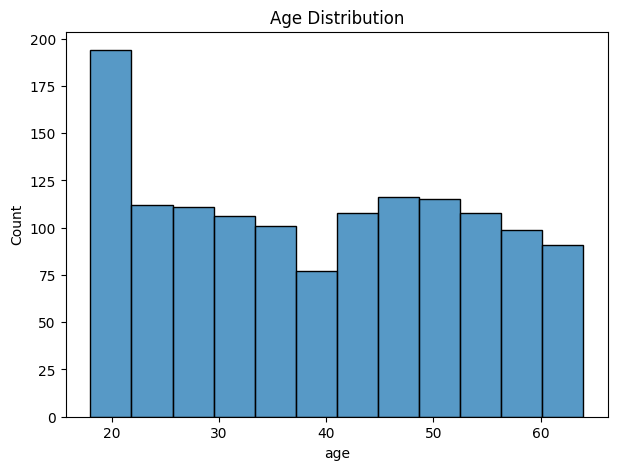

In [10]:
plt.figure(figsize=(7,5))
sns.histplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

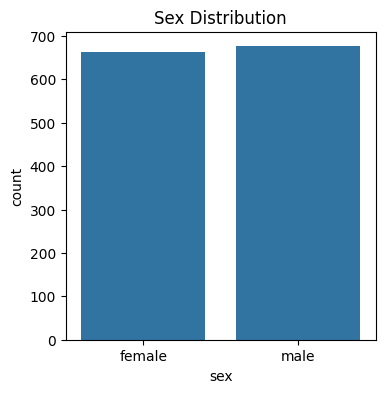

In [12]:
plt.figure(figsize=(4,4))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [13]:
insurance_dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

Average BMI(Body Mass Index) of a person -->  18.5 to 24.9
(bmi is calculated based on person weight and height)

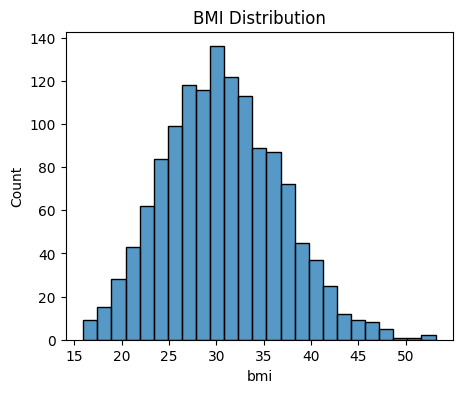

In [15]:
plt.figure(figsize=(5,4))
sns.histplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

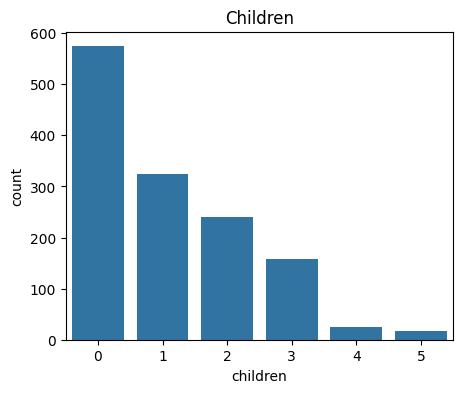

In [18]:
plt.figure(figsize=(5,4))
sns.countplot(x='children', data=insurance_dataset)
plt.title('Children')
plt.show()

In [19]:
insurance_dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

Non-smokers are more than the smokers

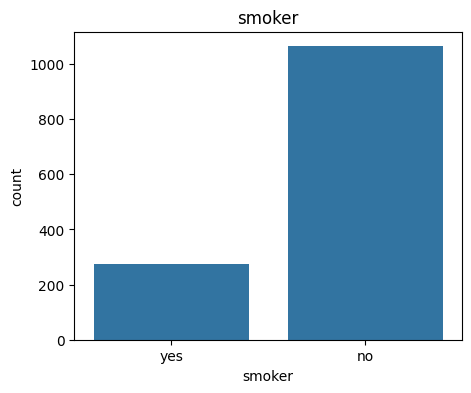

In [16]:
plt.figure(figsize=(5,4))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('smoker')
plt.show()

In [17]:
insurance_dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

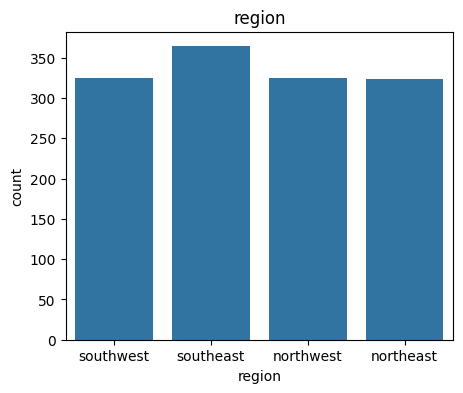

In [18]:
plt.figure(figsize=(5,4))
sns.countplot(x='region', data=insurance_dataset)
plt.title('region')
plt.show()

In [19]:
insurance_dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

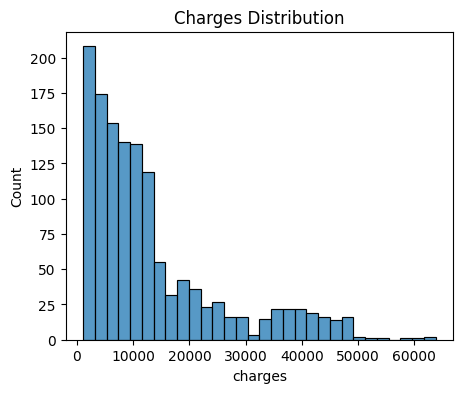

In [20]:
plt.figure(figsize=(5,4))
sns.histplot(insurance_dataset['charges'])
plt.title('Charges Distribution')
plt.show()

We have 3 categorical features, we can not feed text data to a model, it understands numerical values, so we convert them into numeric labels
    Converting categorical column to numerical column is called encoding the categorical features

In [21]:
insurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)

insurance_dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

Splitting the features and Target

In [22]:
X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges']

x have all features except target 

In [23]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


y contains Target feature

In [24]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Splitting the data into train and test data

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [26]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model training using train data

In [27]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

predicting based on train data

In [28]:
training_data_prediction =regressor.predict(X_train)

comparing train data with predicted data

In [29]:
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared vale : ', r2_train)

R squared vale :  0.751505643411174


predicting based on test data

In [30]:
test_data_prediction =regressor.predict(X_test)

comparing test data with predicted data


In [31]:
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared vale : ', r2_test)

R squared vale :  0.7447273869684077


In [32]:
import joblib
joblib.dump(regressor, 'insurance_model.pkl') #save the model

['insurance_model.pkl']

In [33]:
input_data = (31,1,25.74,3,1,0)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[5500.90372538]
The insurance cost is USD  5500.903725377468
